<a href="https://colab.research.google.com/github/Vsevolod245/ML-Tasks/blob/master/ML_Lab1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Лабораторная работа №1

##Найти минимумы функций оптимизации с помощью градиентного спуска

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import math

Функция Шаффера №2

In [ ]:
#Функция Шаффера №2
def Sh2_E(x,y):
  return 0.5+((math.sin(x**2-y**2))**2-0.5)/(1+0.001*(x**2+y**2))**2
#Производная по x
def Sh2_dEdx(x,y):
  return (x*(-0.004*(math.sin(x**2-y**2))**2+(0.004*x**2+0.004*y**2+4)*math.sin(x**2-y**2)*math.cos(x**2-y**2)+0.002))/(0.001*(x**2+y**2)+1)**3
#Производная по y
def Sh2_dEdy(x,y):
  return (y*(-0.004*(math.sin(x**2-y**2))**2+(-0.004*x**2-0.004*y**2-4)*math.sin(x**2-y**2)*math.cos(x**2-y**2)+0.002))/(0.001*(x**2+y**2)+1)**3

Функция Шаффера №4

In [ ]:
#Функция Шаффера №4
def Sh4_E(x,y):
  return 0.5+((math.cos(math.sin(abs(x**2-y**2))))**2-0.5)/(1+0.001*(x**2+y**2))**2
#Производная по x
def Sh4_dEdx(x,y):
  return (x*(-0.004*((math.cos(math.sin(abs(x**2-y**2))))**2-0.5)-1/abs(x**2-y**2)*4*(x**2-y**2)*(0.001*(x**2+y**2)+1)*math.sin(math.sin(abs(x**2-y**2)))*math.cos(abs(x**2-y**2))*math.cos(math.sin(abs(x**2-y**2)))))/(0.001*(x**2+y**2)+1)**3
#Производная по y
def Sh4_dEdy(x,y):
  return (y*(1/abs(x**2-y**2)*4*(x**2-y**2)*(0.001*(x**2+y**2)+1)*math.sin(math.sin(abs(x**2-y**2)))*math.cos(abs(x**2-y**2))*math.cos(math.sin(abs(x**2-y**2)))-0.004*((math.cos(math.sin(abs(x**2-y**2))))**2-0.5)))/(0.001*(x**2+y**2)+1)**3

График

In [ ]:
def Plot(E, x1, y1, PlotMin, PlotMax):
  '''
  E - функция
  x, y - конечное положение точки
  PlotMin, PlotMax - область определения функции
  '''
  x_plt = np.arange(PlotMin,PlotMax,0.1)
  y_plt = np.arange(PlotMin,PlotMax,0.1)
  E_plt = np.array([[E(x,y) for x in x_plt] for y in y_plt])
  #интерактивное отображения графика
  plt.ion()
  fig = plt.figure()
  ax = Axes3D(fig)
  #Создание графика
  x, y = np.meshgrid(x_plt,y_plt)
  ax.plot_surface(x,y, E_plt, cmap=cm.ocean, alpha=0.5)
  #Подписи осей
  ax.set_xlabel('x')
  ax.set_ylabel('y')
  ax.set_zlabel('E')
  #Вывод значений на консоль
  ax.scatter(x1,y1,E(x1,y1), c='red')
  print('x={0}, y={1}, E={2}'.format(x1,y1,E(x1,y1)))
  #Выключение интерактивного отображения
  plt.ioff()
  plt.show()

Метод градиентного спуска

In [ ]:
def GD(E, dEdx, dEdy, x0, y0, LearningRate, Iterations, PlotMin, PlotMax):
  '''
  E - функция
  dEdx, dEdy - частные производные функции
  x0, y0 - начальные приближения точки
  LearningRate - скорость обучения
  Iterations - количество итераций
  PlotMin, PlotMax - область определения функции
  '''
  x1=x0-LearningRate * dEdx(x0,y0)
  y1=y0-LearningRate * dEdy(x0,y0)
  for _ in range(Iterations):
    x0=x1
    y0=y1
    x1=x0-LearningRate * dEdx(x0,y0)
    y1=y0-LearningRate * dEdy(x0,y0)
  # Рисуем график
  Plot(E, x1, y1, PlotMin, PlotMax)

Стохастический градиентный спуск моментный

In [ ]:
def StochasticGD(E, dEdx, dEdy, x0, y0, LearningRate, Iterations, PlotMin, PlotMax, m):
  '''
  E - функция
  dEdx, dEdy - частные производные функции
  x0, y0 - начальные приближения точки
  LearningRate - скорость обучения
  Iterations - количество итераций
  PlotMin, PlotMax - область определения функции
  m - моментная характеристика
  '''
  x1=x0-LearningRate * dEdx(x0,y0)
  y1=y0-LearningRate * dEdy(x0,y0)
  for n in range(Iterations):
    x0=x1
    y0=y1
    if n==0:
      vx = dEdx(x0,y0)
      vy = dEdy(x0,y0)
    else:
      vx = m * vx + dEdx(x0,y0)
      vy = m * vy + dEdy(x0,y0)
    x1=x0-LearningRate * vx
    y1=y0-LearningRate * vy
  # Рисуем график
  Plot(E, x1, y1, PlotMin, PlotMax)

Adagrad

In [ ]:
def AdagradGD(E, dEdx, dEdy, point, LearningRate, Iterations, PlotMin, PlotMax):
  '''
  E - функция
  dEdx, dEdy - частные производные функции
  point - начальные приближения точки
  LearningRate - скорость обучения
  Iterations - количество итераций
  PlotMin, PlotMax - область определения функции
  '''
  s_sum_x = 0
  s_sum_y = 0
  x1=point[0]-LearningRate * dEdx(point[0], point[1])
  y1=point[1]-LearningRate * dEdy(point[0], point[1])
  for _ in range(Iterations):
    point[0]=x1
    point[1]=y1
    s_sum_x += dEdx(point[0], point[1])**2
    s_sum_y += dEdy(point[0], point[1])**2
    x1 = point[0] - LearningRate * (dEdx(point[0], point[1]) / math.sqrt(s_sum_x))
    y1 = point[1] - LearningRate * (dEdy(point[0], point[1]) / math.sqrt(s_sum_y))
  # Рисуем график
  Plot(E, x1, y1, PlotMin, PlotMax)

Тест для функции Шаффера №2

Локальный минимум $f(0,0)=0$



___GD___
x=-0.9999898610058021, y=0.9999898610058021, E=0.0019939756466866854


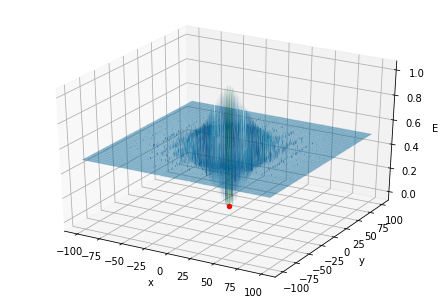

___StochasticGD___
x=-0.9998976308535369, y=0.9998976308535369, E=0.001993608951158854


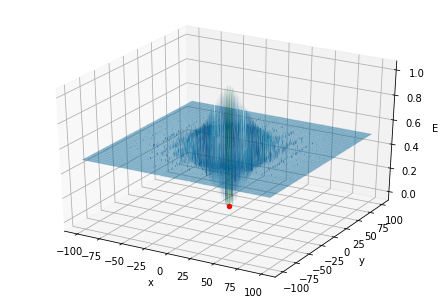

___AdagradGD___
x=-0.9814716535667376, y=0.9814716535667376, E=0.0019210199542907813


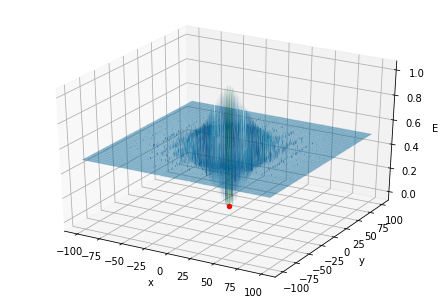

In [ ]:
print("___GD___")
TestSh2_GD = GD(Sh2_E, Sh2_dEdx, Sh2_dEdy, -1, 1, 0.0001, 50, -100, 100)
print("___StochasticGD___")
TestSh2_Stochastic = StochasticGD(Sh2_E, Sh2_dEdx, Sh2_dEdy, -1, 1, 0.001, 50, -100, 100, 0.01)
print("___AdagradGD___")
TestSh2_Adagrad = AdagradGD(Sh2_E, Sh2_dEdx, Sh2_dEdy, np.array([-1.0,1.0]), 0.001, 100, -100, 100)

Тест для функции Шаффера №4

Локальный минимум $f(0,1.25313)=0.292579$



___GD___
x=0.0, y=1.0054294611126782, E=0.4383768399766011


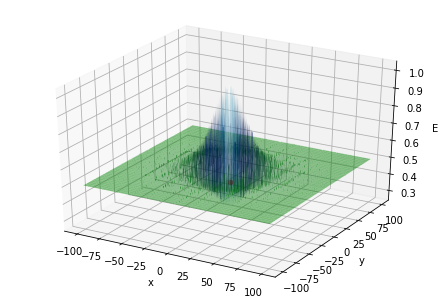

___StochasticGD___
x=0.0, y=1.0514115384556044, E=0.39280606724674244


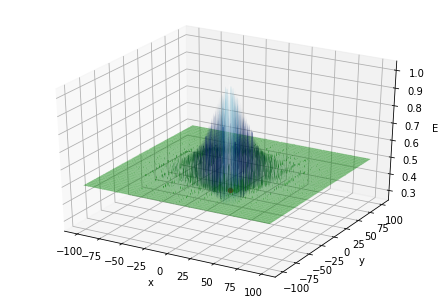

___AdagradGD___
x=8.000009870644123, y=0.0, E=0.3824599302705293


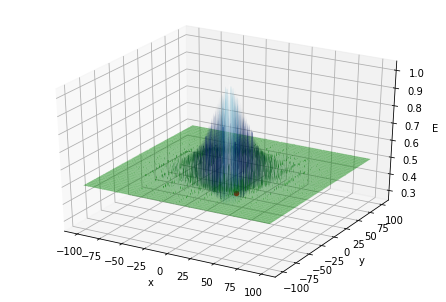

In [ ]:
print("___GD___")
TestSh4_GD = GD(Sh4_E, Sh4_dEdx, Sh4_dEdy, 0, 1, 0.0001, 50, -100, 100)
print("___StochasticGD___")
TestSh4_Stochastic = StochasticGD(Sh4_E, Sh4_dEdx, Sh4_dEdy, 0, 1, 0.001, 50, -100, 100, 0.01)
print("___AdagradGD___")
TestSh4_Adagrad = AdagradGD(Sh4_E, Sh4_dEdx, Sh4_dEdy, np.array([10, 1]), 0.0001, 100, -100, 100)